In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
train = pd.read_csv('/content/drive/MyDrive/Neuro DIve関係/kaggleチーム用/store-sales-time-series-forecasting (1)/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Neuro DIve関係/kaggleチーム用/store-sales-time-series-forecasting (1)/test.csv')
stores = pd.read_csv('/content/drive/MyDrive/Neuro DIve関係/kaggleチーム用/store-sales-time-series-forecasting (1)/stores.csv')
oil = pd.read_csv('/content/drive/MyDrive/Neuro DIve関係/kaggleチーム用/store-sales-time-series-forecasting (1)/oil.csv')
transactions = pd.read_csv('/content/drive/MyDrive/Neuro DIve関係/kaggleチーム用/store-sales-time-series-forecasting (1)/transactions.csv').sort_values(["store_nbr", "date"])
holidays = pd.read_csv('/content/drive/MyDrive/Neuro DIve関係/kaggleチーム用/store-sales-time-series-forecasting (1)/holidays_events.csv')

In [5]:
print('train;',train.head())
print('test;',test.head())
print('stores;',stores.head())
print('oil;',oil.head())
print('transactions;',transactions.head())
print('holidays;',holidays.head())

train;    id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0
test;         id        date  store_nbr      family  onpromotion
0  3000888  2017-08-16          1  AUTOMOTIVE            0
1  3000889  2017-08-16          1   BABY CARE            0
2  3000890  2017-08-16          1      BEAUTY            2
3  3000891  2017-08-16          1   BEVERAGES           20
4  3000892  2017-08-16          1       BOOKS            0
stores;    store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito          

In [6]:
m1=pd.merge(train,stores,on='store_nbr',how='left')

In [7]:
m2=pd.merge(oil,holidays,on='date',how='left')

In [8]:
m1.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13


In [9]:
m1=pd.merge(holidays,oil)
m2=pd.merge(train,stores)
m3=pd.merge(m2,transactions)
df=pd.merge(m3,m1,on="date")

In [10]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,transactions,type_y,locale,locale_name,description,transferred,dcoilwtico
0,73062,2013-02-11,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
1,73063,2013-02-11,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
2,73064,2013-02-11,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
3,73065,2013-02-11,1,BEVERAGES,172.0,0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
4,73066,2013-02-11,1,BOOKS,0.0,0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01


In [11]:
df.isnull().sum()

id                  0
date                0
store_nbr           0
family              0
sales               0
onpromotion         0
city                0
state               0
type_x              0
cluster             0
transactions        0
type_y              0
locale              0
locale_name         0
description         0
transferred         0
dcoilwtico      22044
dtype: int64

In [12]:
df['dcoilwtico'].value_counts()

107.04    6204
59.59     4950
95.25     4653
46.21     3531
36.12     3498
          ... 
90.74     1518
94.09     1518
91.23     1518
97.10     1518
97.01     1518
Name: dcoilwtico, Length: 163, dtype: int64

In [13]:
df['dcoilwtico'].describe()

count    300003.000000
mean         64.077912
std          25.147682
min          27.960000
25%          44.660000
50%          51.440000
75%          94.740000
max         107.950000
Name: dcoilwtico, dtype: float64

In [14]:
df['dcoilwtico'].fillna(df['dcoilwtico'].mean(),inplace=True)

In [15]:
df.isnull().sum()

id              0
date            0
store_nbr       0
family          0
sales           0
onpromotion     0
city            0
state           0
type_x          0
cluster         0
transactions    0
type_y          0
locale          0
locale_name     0
description     0
transferred     0
dcoilwtico      0
dtype: int64

In [16]:
df.dtypes

id                int64
date             object
store_nbr         int64
family           object
sales           float64
onpromotion       int64
city             object
state            object
type_x           object
cluster           int64
transactions      int64
type_y           object
locale           object
locale_name      object
description      object
transferred        bool
dcoilwtico      float64
dtype: object

In [17]:
df.describe()

,id,store_nbr,sales,onpromotion,cluster,transactions,dcoilwtico
count,3.220470e+05,322047.000000,322047.000000,322047.000000,322047.000000,322047.000000,322047.000000
mean,1.682979e+06,26.994672,406.383452,3.727136,8.531202,1734.117840,64.077912
std,7.862493e+05,15.595174,1246.881240,15.512095,4.713809,1050.335018,24.271750
min,5.610000e+02,1.000000,0.000000,0.000000,1.000000,54.000000,27.960000
25%,1.010616e+06,13.000000,1.000000,0.000000,4.000000,1030.000000,44.940000
50%,1.842406e+06,27.000000,19.000000,0.000000,9.000000,1409.000000,52.720000
75%,2.209556e+06,40.000000,241.260505,1.000000,13.000000,2148.000000,93.120000
max,3.000887e+06,54.000000,124717.000000,716.000000,17.000000,8359.000000,107.950000


In [18]:
df['date']=pd.to_datetime(df['date'])

In [19]:
df.dtypes

id                       int64
date            datetime64[ns]
store_nbr                int64
family                  object
sales                  float64
onpromotion              int64
city                    object
state                   object
type_x                  object
cluster                  int64
transactions             int64
type_y                  object
locale                  object
locale_name             object
description             object
transferred               bool
dcoilwtico             float64
dtype: object

In [20]:
import datetime 

In [21]:
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day
df['dayofweek']=df['date'].dt.dayofweek

In [22]:
df.dtypes

id                       int64
date            datetime64[ns]
store_nbr                int64
family                  object
sales                  float64
onpromotion              int64
city                    object
state                   object
type_x                  object
cluster                  int64
transactions             int64
type_y                  object
locale                  object
locale_name             object
description             object
transferred               bool
dcoilwtico             float64
year                     int64
month                    int64
day                      int64
dayofweek                int64
dtype: object

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

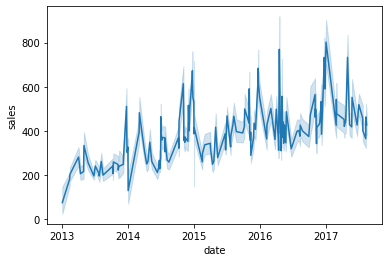

In [24]:
sns.lineplot(x='date',y='sales',data=df,estimator='mean')
plt.show()

dateが増えるにつれて、salesも増えている

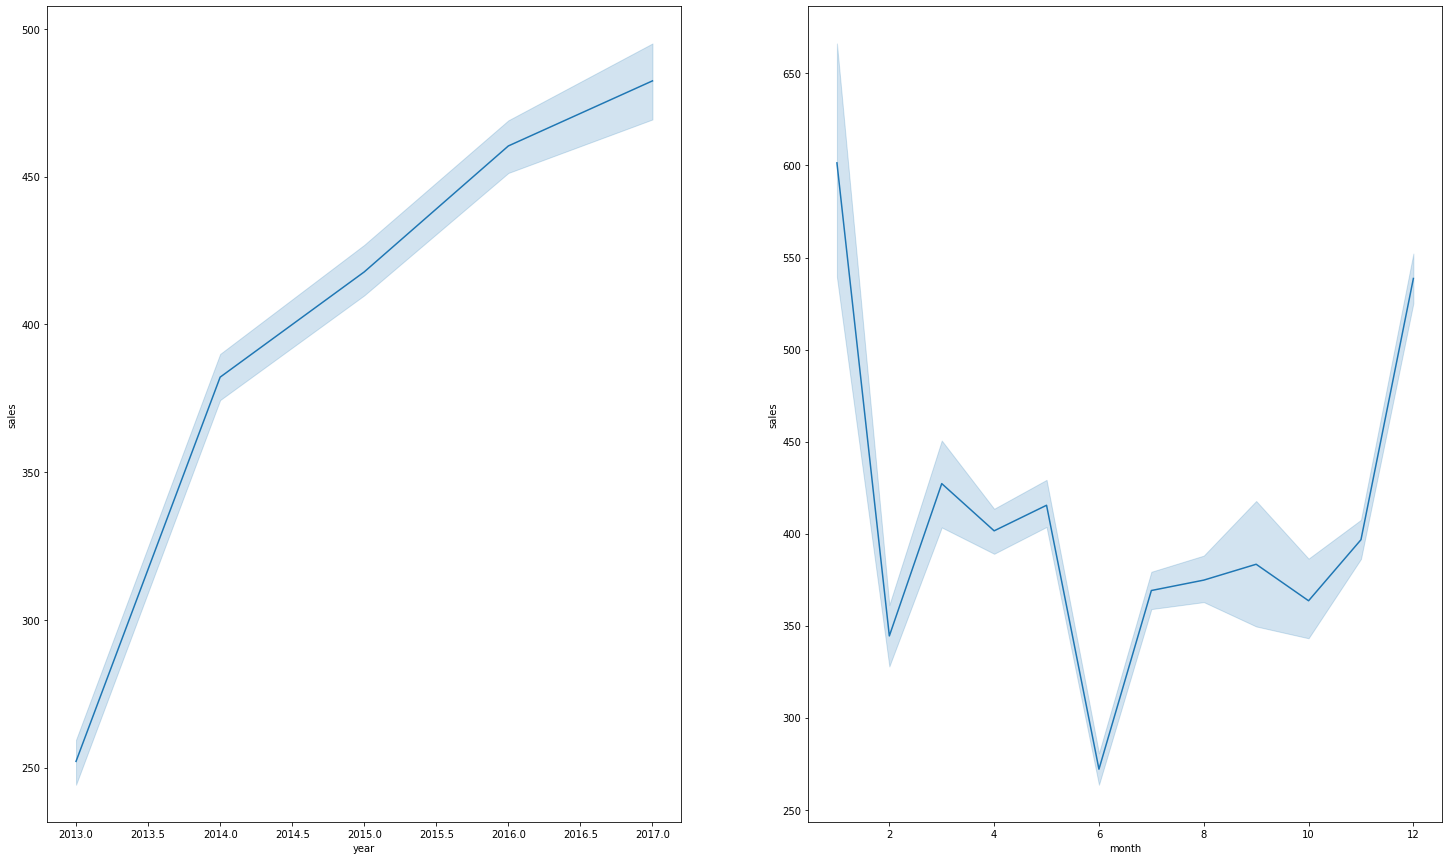

In [25]:
f,ax=plt.subplots(1,2,figsize=(25,15))
sns.lineplot(x='year',y='sales',data=df,estimator='mean',ax=ax[0])
sns.lineplot(x='month',y='sales',data=df,estimator='mean',ax=ax[1])

年単位では、毎年salesが上がっている
月単位では、12月と1月など、年末年始に高いが、2月と6月に急激に下がることが分かる。

In [26]:
df['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [27]:
d=df.groupby('family')['sales'].mean().sort_values(ascending=False)

In [28]:
type(d)

pandas.core.series.Series

In [29]:
d=pd.DataFrame(d)
print(d)

                                  sales
family                                 
GROCERY I                   4301.025262
BEVERAGES                   2670.760324
PRODUCE                     1648.232187
CLEANING                    1146.483144
DAIRY                        768.193770
BREAD/BAKERY                 477.391889
POULTRY                      390.903089
MEATS                        376.115072
PERSONAL CARE                294.060355
DELI                         283.041453
FROZEN FOODS                 272.382093
HOME CARE                    211.202787
EGGS                         182.421355
LIQUOR,WINE,BEER             126.858387
PREPARED FOODS               101.983938
GROCERY II                    26.342556
HOME AND KITCHEN I            26.237319
SEAFOOD                       22.750368
HOME AND KITCHEN II           19.404652
CELEBRATION                   10.604160
PLAYERS AND ELECTRONICS        8.076955
LADIESWEAR                     7.771083
LINGERIE                       7.584486


In [30]:
d.dtypes
d.shape

(33, 1)

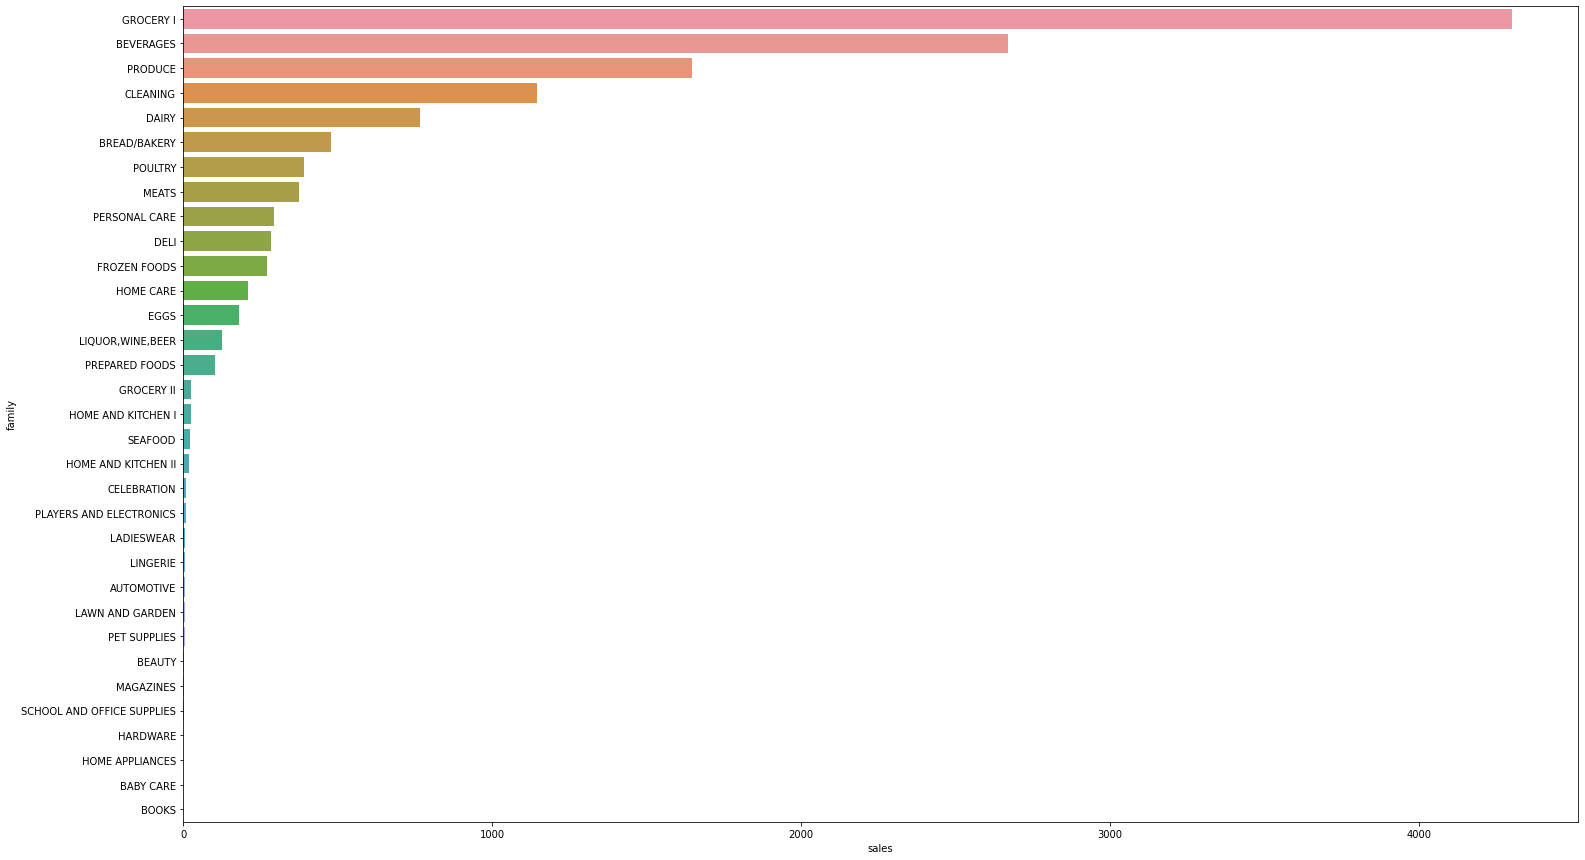

In [31]:
ax,f=plt.subplots(figsize=(25,15))
sns.barplot(x='sales',y=d.index,data=d)
plt.show()

製品別の売り上げを見ると、食べものの売り上げが多いことが分かる。

In [32]:
df.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'city',
       'state', 'type_x', 'cluster', 'transactions', 'type_y', 'locale',
       'locale_name', 'description', 'transferred', 'dcoilwtico', 'year',
       'month', 'day', 'dayofweek'],
      dtype='object')

In [33]:
df.head()
df['onpromotion'].value_counts()

0      238596
1       23351
2       10068
3        5900
4        4381
        ...  
317         1
474         1
672         1
293         1
229         1
Name: onpromotion, Length: 285, dtype: int64

In [34]:
s = df.groupby('store_nbr')['sales'].mean().sort_values(ascending=False)
s=pd.DataFrame(s)
print(s)
s.shape


                 sales
store_nbr             
44         1139.854249
45         1038.203442
47          945.397136
3           934.942982
49          841.675567
46          783.518644
52          733.925760
48          663.533389
51          628.050591
8           557.810344
11          544.435887
50          537.672207
7           522.635862
24          497.831769
9           490.732723
20          476.172817
6           464.664831
2           442.265443
39          380.190031
37          376.752052
21          367.922874
27          363.083175
42          355.880876
4           347.446046
28          345.525828
31          345.274752
38          342.945624
40          340.196888
29          337.686697
17          336.169970
34          328.067855
36          318.488751
43          317.407731
53          312.430660
5           296.173511
41          285.916646
1           275.260882
25          269.214030
18          262.438319
33          262.107702
19          242.828496
23         

(54, 1)

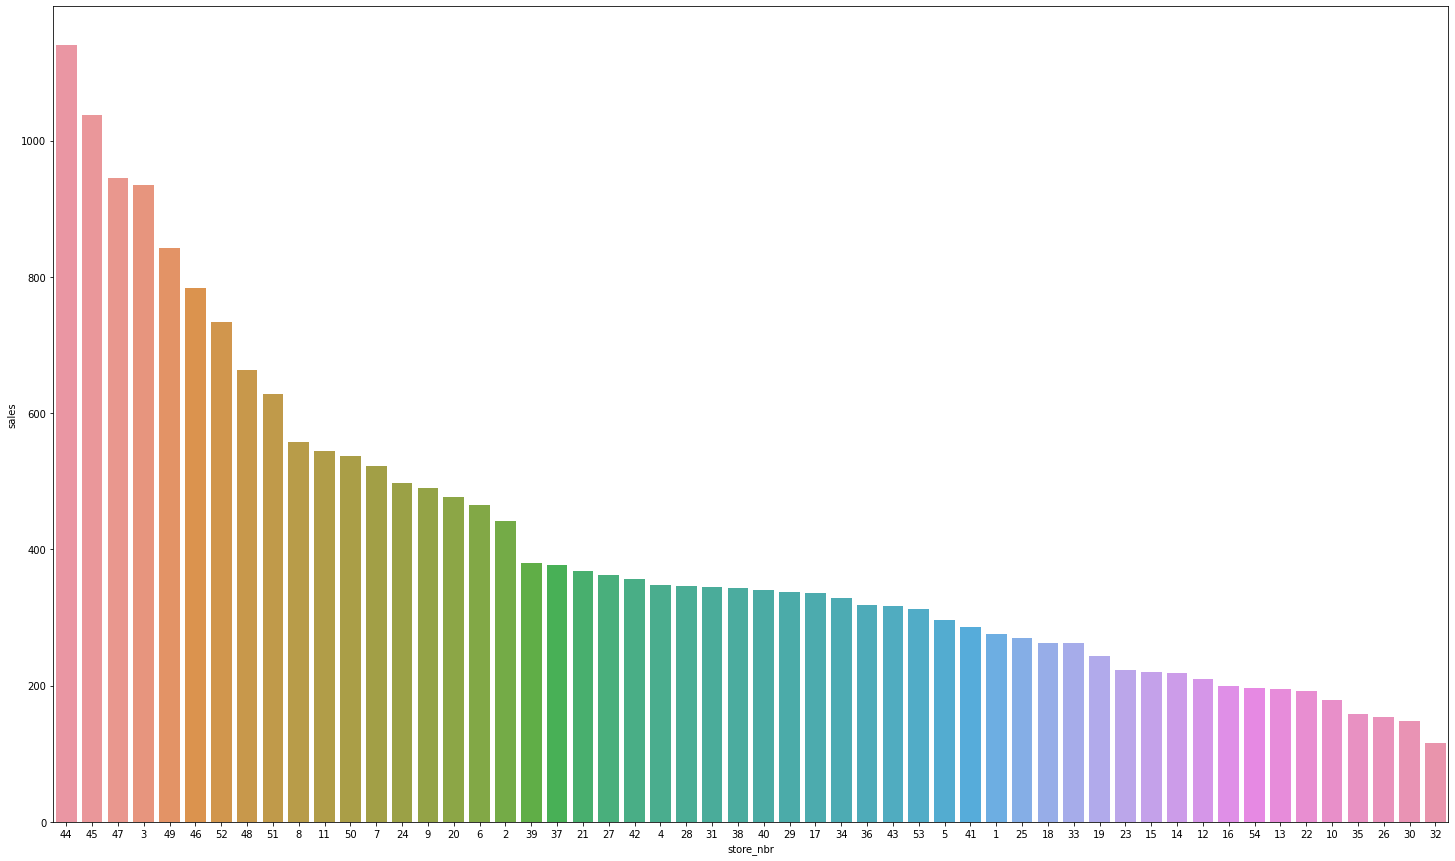

In [35]:
ax,f =plt.subplots(figsize=(25,15))
sns.barplot(x=s.index,y='sales',data=s,order=s.index)
plt.show()

売上が高いのは44,45,47
低いのは32,30など
→どの州、都市に店舗があるのか？

In [36]:
c=df.groupby('city')['sales'].mean().sort_values(ascending=False)
c=pd.DataFrame(c)
d.shape

(33, 1)

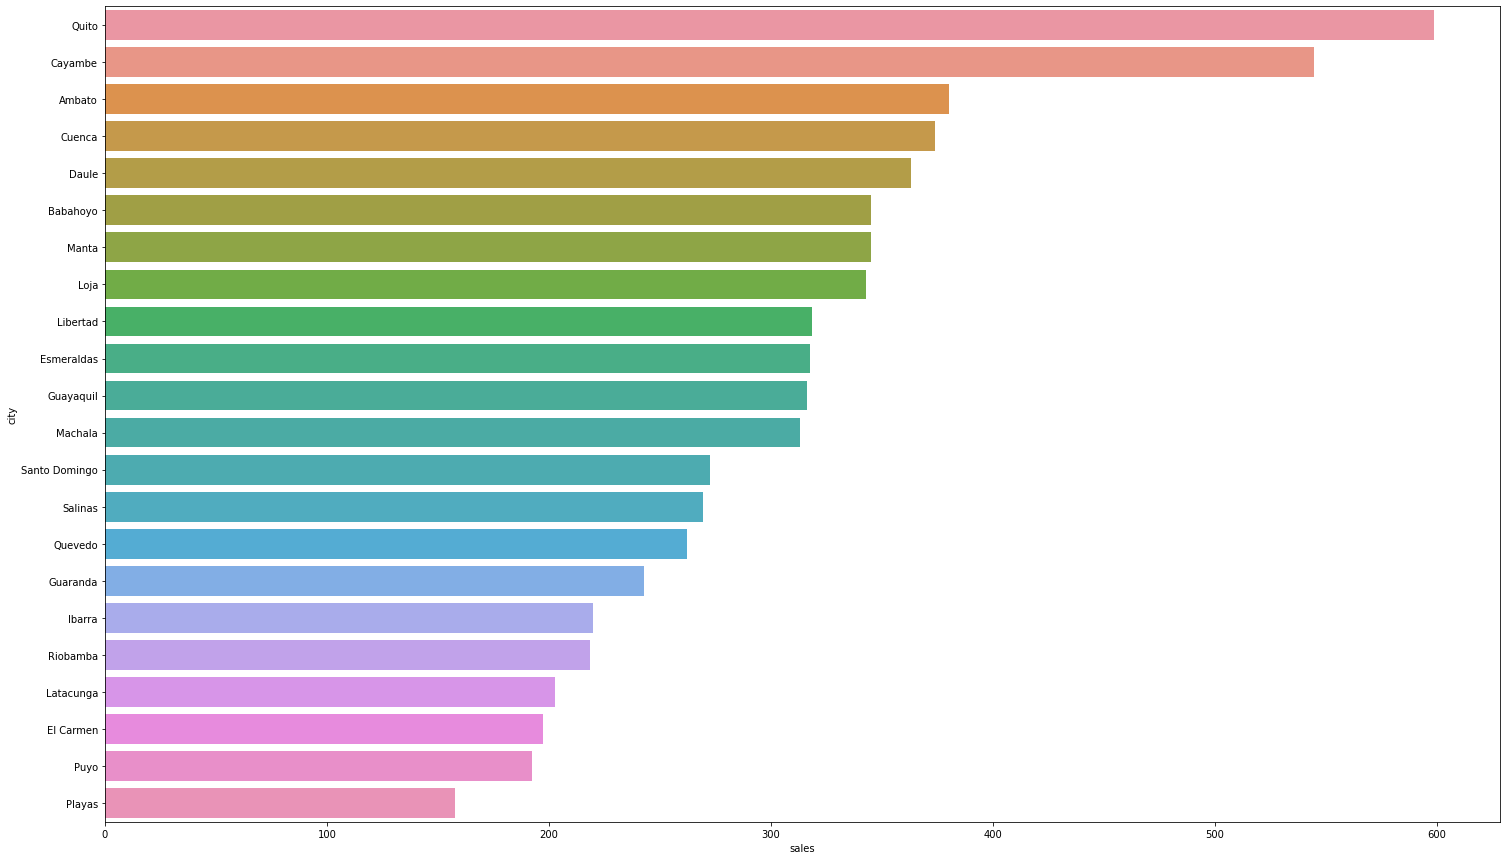

In [37]:
ax,f=plt.subplots(figsize=(25,15))
sns.barplot(x='sales',y=c.index,data=c)
plt.show()

In [38]:
state2 =df.groupby('state')['sales'].mean().sort_values(ascending=False)
state2 = pd.DataFrame(state2)

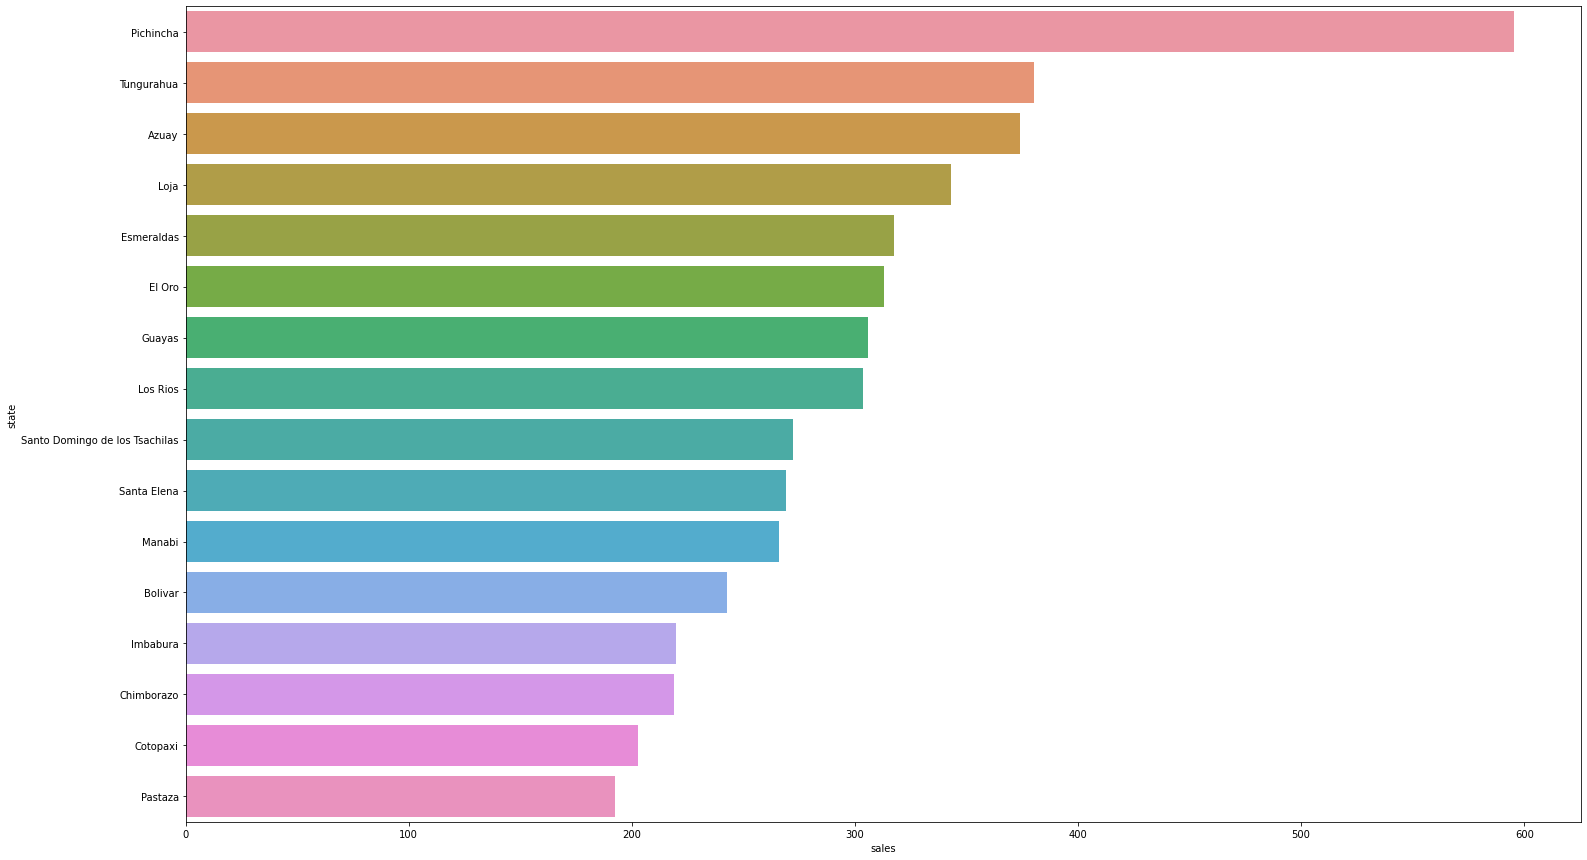

In [39]:
ax,f = plt.subplots(figsize=(25,15))
sns.barplot(x='sales',y=state2.index,data=state2)
plt.show()

In [40]:
df.groupby(['city','state'])['sales'].mean().sort_values(ascending=False)

city           state                         
Quito          Pichincha                         598.460909
Cayambe        Pichincha                         544.435887
Ambato         Tungurahua                        380.064902
Cuenca         Azuay                             373.953008
Daule          Guayas                            363.083175
Babahoyo       Los Rios                          345.274752
Manta          Manabi                            344.853360
Loja           Loja                              342.945624
Libertad       Guayas                            318.488751
Esmeraldas     Esmeraldas                        317.407731
Guayaquil      Guayas                            316.137035
Machala        El Oro                            313.056767
Santo Domingo  Santo Domingo de los Tsachilas    272.437565
Salinas        Santa Elena                       269.214030
Quevedo        Los Rios                          262.107702
Guaranda       Bolivar                           242.8

cityはQuito         stateは Pichincha の売り上げが多いことが分かる

In [41]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,transactions,type_y,locale,locale_name,description,transferred,dcoilwtico,year,month,day,dayofweek
0,73062,2013-02-11,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01,2013,2,11,0
1,73063,2013-02-11,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01,2013,2,11,0
2,73064,2013-02-11,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01,2013,2,11,0
3,73065,2013-02-11,1,BEVERAGES,172.0,0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01,2013,2,11,0
4,73066,2013-02-11,1,BOOKS,0.0,0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01,2013,2,11,0


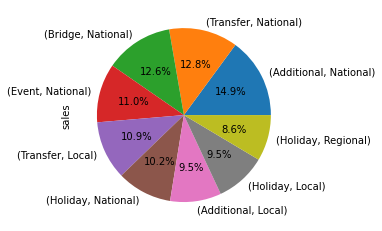

In [42]:
g=df.groupby(['type_y','locale'])['sales'].mean().sort_values(ascending=False)
g.plot(kind='pie',autopct='%1.1f%%')
plt.show()

localeがnationalで、type_yがAdditional,Transfer,Bridge,Eventの時にsalesが大きいことが分かる

In [43]:
df.dtypes

id                       int64
date            datetime64[ns]
store_nbr                int64
family                  object
sales                  float64
onpromotion              int64
city                    object
state                   object
type_x                  object
cluster                  int64
transactions             int64
type_y                  object
locale                  object
locale_name             object
description             object
transferred               bool
dcoilwtico             float64
year                     int64
month                    int64
day                      int64
dayofweek                int64
dtype: object

In [44]:
df.set_index('date',inplace=True)

In [45]:
df.head()

,id,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,transactions,type_y,locale,locale_name,description,transferred,dcoilwtico,year,month,day,dayofweek
date,,,,,,,,,,,,,,,,,,,,
2013-02-11,73062,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01,2013,2,11,0
2013-02-11,73063,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01,2013,2,11,0
2013-02-11,73064,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01,2013,2,11,0
2013-02-11,73065,1,BEVERAGES,172.0,0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01,2013,2,11,0
2013-02-11,73066,1,BOOKS,0.0,0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01,2013,2,11,0


In [46]:
df.drop('id',axis=1,inplace=True)

In [47]:
object_columns =df.select_dtypes(include='object').columns

In [48]:
object_columns

Index(['family', 'city', 'state', 'type_x', 'type_y', 'locale', 'locale_name',
       'description'],
      dtype='object')

In [49]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [50]:
for c in object_columns:
    le.fit(df[c])
    df[c] =le.transform(df[c])

In [51]:
df.dtypes

store_nbr         int64
family            int64
sales           float64
onpromotion       int64
city              int64
state             int64
type_x            int64
cluster           int64
transactions      int64
type_y            int64
locale            int64
locale_name       int64
description       int64
transferred        bool
dcoilwtico      float64
year              int64
month             int64
day               int64
dayofweek         int64
dtype: object

In [52]:
def change(x):
    if x ==True:
        return 1
    else:
        return 0

In [53]:
df['transferred']=df['transferred'].apply(change)

In [54]:
df.dtypes

store_nbr         int64
family            int64
sales           float64
onpromotion       int64
city              int64
state             int64
type_x            int64
cluster           int64
transactions      int64
type_y            int64
locale            int64
locale_name       int64
description       int64
transferred       int64
dcoilwtico      float64
year              int64
month             int64
day               int64
dayofweek         int64
dtype: object

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
X=df.drop('sales',axis=1)
Y=df['sales']

In [57]:
import lightgbm as lgb

In [58]:
params ={
    'objective':'regression',
    'metric':'neg_mean_squared_log_error'
}

In [59]:
from sklearn.metrics import mean_squared_error as MSE

In [60]:
from sklearn.model_selection import TimeSeriesSplit

In [61]:
folds = TimeSeriesSplit(n_splits=5)

In [62]:
for i,(train_index,test_index) in enumerate(folds.split(X)):
    X_train,X_test = X.iloc[train_index],X.iloc[test_index]
    Y_train,Y_test = Y.iloc[train_index],Y.iloc[test_index]
    Y_train = np.log1p(Y_train)

    train_data=lgb.Dataset(X_train,Y_train)
    eval_data=lgb.Dataset(X_test,Y_test,reference=train_data)
    gbm = lgb.train(
        params,
        train_data,
        valid_sets=[train_data,eval_data])
    pred = gbm.predict(X_test)
    pred = np.expm1(pred)
    print(pred)
    mse = MSE(Y_test,pred)
    rmse=np.sqrt(mse)
    print('rmsle:',rmse)
    

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004759 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 525
[LightGBM] [Info] Number of data points in the train set: 53677, number of used features: 18
[LightGBM] [Info] Start training from score 2.579518
[ 2.74763472e-01  2.10658083e+00  1.01561881e+01 ...  8.44328190e+00
  2.88714895e+00 -5.74096209e-03]
rmsle: 573.5927439054784
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009996 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 676
[LightGBM] [Info] Number of data points in the train set: 107351, number of used features: 18
[LightGBM] [Info] Start training from score 2.822781
[ 1.18668104e+00  1.58065168e+03 -8.08992355e-02 ...  1

In [63]:
from sklearn.metrics import r2_score

In [64]:
for i,(train_index,test_index) in enumerate(folds.split(X)):
    X_train,X_test = X.iloc[train_index],X.iloc[test_index]
    Y_train,Y_test = Y.iloc[train_index],Y.iloc[test_index]

    train_data=lgb.Dataset(X_train,Y_train)
    eval_data=lgb.Dataset(X_test,Y_test,reference=train_data)
    gbm = lgb.train(
        params,
        train_data,
        valid_sets=[train_data,eval_data])
    pred = gbm.predict(X_test)
    kk= r2_score(Y_test,pred)
  
   
    print('r2_score:',kk)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 525
[LightGBM] [Info] Number of data points in the train set: 53677, number of used features: 18
[LightGBM] [Info] Start training from score 264.909547
r2_score: 0.7312877136711449
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025355 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 676
[LightGBM] [Info] Number of data points in the train set: 107351, number of used features: 18
[LightGBM] [Info] Start training from score 302.044040
r2_score: 0.8318247910542552
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013734 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not

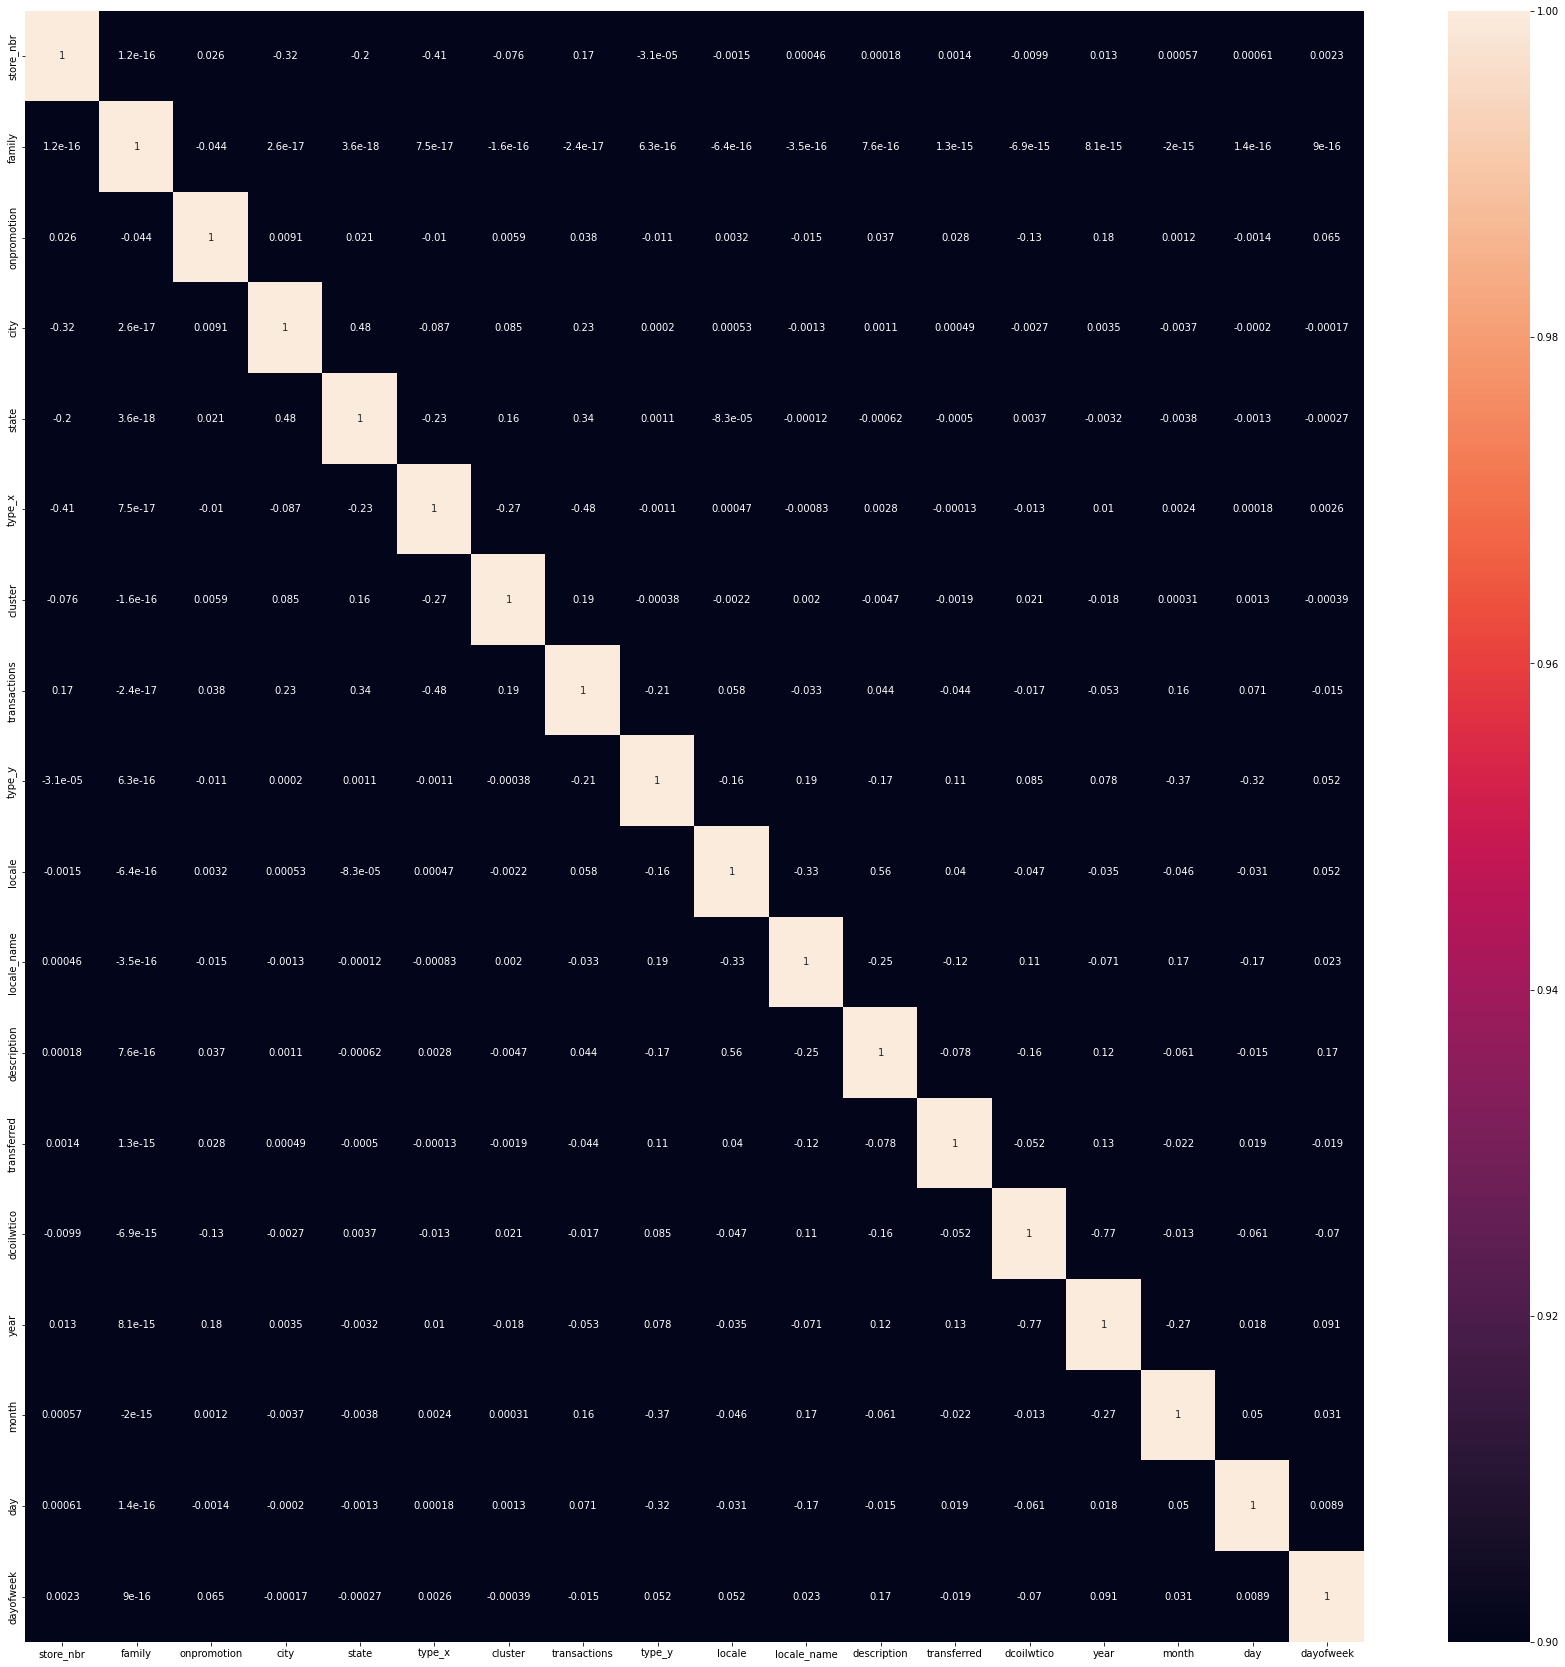

In [65]:
plt.figure(figsize=(30,30))
sns.heatmap(X.corr(),annot=True,vmax=1,vmin=0.9)
plt.show()

In [66]:
X.corr()

,store_nbr,family,onpromotion,city,state,type_x,cluster,transactions,type_y,locale,locale_name,description,transferred,dcoilwtico,year,month,day,dayofweek
store_nbr,1.000000e+00,1.239671e-16,0.025992,-3.218386e-01,-2.030420e-01,-4.053395e-01,-7.566738e-02,1.719464e-01,-3.080555e-05,-1.474860e-03,4.594414e-04,1.797077e-04,1.439638e-03,-9.930930e-03,1.282491e-02,5.719460e-04,6.059542e-04,2.251073e-03
family,1.239671e-16,1.000000e+00,-0.043938,2.604060e-17,3.628011e-18,7.466355e-17,-1.633913e-16,-2.350086e-17,6.298024e-16,-6.400981e-16,-3.529305e-16,7.603889e-16,1.311498e-15,-6.943490e-15,8.116249e-15,-2.004757e-15,1.403280e-16,9.028674e-16
onpromotion,2.599237e-02,-4.393808e-02,1.000000,9.065311e-03,2.106063e-02,-1.037240e-02,5.895378e-03,3.816341e-02,-1.078292e-02,3.222987e-03,-1.453080e-02,3.727402e-02,2.832537e-02,-1.297965e-01,1.752303e-01,1.238509e-03,-1.373391e-03,6.522188e-02
city,-3.218386e-01,2.604060e-17,0.009065,1.000000e+00,4.814132e-01,-8.704385e-02,8.510282e-02,2.332404e-01,2.018184e-04,5.292496e-04,-1.337988e-03,1.134097e-03,4.937715e-04,-2.711333e-03,3.518680e-03,-3.748254e-03,-2.013135e-04,-1.734661e-04
state,-2.030420e-01,3.628011e-18,0.021061,4.814132e-01,1.000000e+00,-2.330404e-01,1.572789e-01,3.407105e-01,1.086474e-03,-8.334782e-05,-1.167315e-04,-6.246680e-04,-5.032647e-04,3.697512e-03,-3.177303e-03,-3.824029e-03,-1.292301e-03,-2.700516e-04
type_x,-4.053395e-01,7.466355e-17,-0.010372,-8.704385e-02,-2.330404e-01,1.000000e+00,-2.714167e-01,-4.845191e-01,-1.128171e-03,4.671607e-04,-8.294119e-04,2.761468e-03,-1.340286e-04,-1.344349e-02,1.033432e-02,2.444053e-03,1.801775e-04,2.597393e-03
cluster,-7.566738e-02,-1.633913e-16,0.005895,8.510282e-02,1.572789e-01,-2.714167e-01,1.000000e+00,1.888765e-01,-3.824026e-04,-2.218656e-03,2.010895e-03,-4.708144e-03,-1.879768e-03,2.090408e-02,-1.825796e-02,3.077226e-04,1.338857e-03,-3.892904e-04
transactions,1.719464e-01,-2.350086e-17,0.038163,2.332404e-01,3.407105e-01,-4.845191e-01,1.888765e-01,1.000000e+00,-2.112980e-01,5.843311e-02,-3.313308e-02,4.355161e-02,-4.390226e-02,-1.734597e-02,-5.284693e-02,1.554084e-01,7.060588e-02,-1.537986e-02
type_y,-3.080555e-05,6.298024e-16,-0.010783,2.018184e-04,1.086474e-03,-1.128171e-03,-3.824026e-04,-2.112980e-01,1.000000e+00,-1.631555e-01,1.889369e-01,-1.666941e-01,1.103541e-01,8.490843e-02,7.798776e-02,-3.746441e-01,-3.178856e-01,5.203515e-02
locale,-1.474860e-03,-6.400981e-16,0.003223,5.292496e-04,-8.334782e-05,4.671607e-04,-2.218656e-03,5.843311e-02,-1.631555e-01,1.000000e+00,-3.272035e-01,5.647851e-01,4.042582e-02,-4.662696e-02,-3.527402e-02,-4.632994e-02,-3.121740e-02,5.202633e-02


In [67]:
cor=X.corr()

In [68]:
cor[cor > 0.9]

,store_nbr,family,onpromotion,city,state,type_x,cluster,transactions,type_y,locale,locale_name,description,transferred,dcoilwtico,year,month,day,dayofweek
store_nbr,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
family,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
onpromotion,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type_x,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cluster,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transactions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type_y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
locale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
import xgboost as xgb

In [70]:
reg =xgb.XGBRegressor()

In [71]:
reg.fit(X_train,Y_train,eval_set=[(X_train,Y_train),(X_test,Y_test)])

[02:04:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1222.8	validation_1-rmse:1462.85
[1]	validation_0-rmse:1188.9	validation_1-rmse:1405.5
[2]	validation_0-rmse:1157.53	validation_1-rmse:1348.22
[3]	validation_0-rmse:1132.52	validation_1-rmse:1307.63
[4]	validation_0-rmse:1108.46	validation_1-rmse:1265.9
[5]	validation_0-rmse:1087.68	validation_1-rmse:1232.58
[6]	validation_0-rmse:1061.33	validation_1-rmse:1205.09
[7]	validation_0-rmse:1038.45	validation_1-rmse:1156.95
[8]	validation_0-rmse:1014.1	validation_1-rmse:1134.96
[9]	validation_0-rmse:996.563	validation_1-rmse:1097.15
[10]	validation_0-rmse:974.117	validation_1-rmse:1071.86
[11]	validation_0-rmse:961.065	validation_1-rmse:1054.8
[12]	validation_0-rmse:951.282	validation_1-rmse:1033.46
[13]	validation_0-rmse:932.131	validation_1-rmse:1007.09
[14]	validation_0-rmse:923.124	validation_1-rmse:995.747
[15]	validation_0-rmse:906.465	val

XGBRegressor()

In [72]:
pred = reg.predict(X_test)

In [73]:
print(np.sqrt(MSE(Y_test,pred)))

633.7685752178791


In [74]:
dtrain = xgb.DMatrix(X_train,label=Y_train,)

In [75]:
pip install pycaret

  Using cached numpy-1.19.5-cp37-cp37m-manylinux2010_x86_64.whl (14.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
tensorflow 2.8.0 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [76]:
pip install numpy --upgrade --ignore-installed

  Using cached numpy-1.21.5-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.5 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [77]:
import pandas as pd
from pycaret.regression import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [78]:
reg = xgb.XGBRegressor()
params = {
    "learning_rate"   : [0.1,0.3,0.5],
    "max_depth"       : [2,3,5],
}

In [79]:
from sklearn.model_selection import TimeSeriesSplit

In [80]:
from sklearn.model_selection import GridSearchCV
GridSearchCV(reg,params)

GridSearchCV(estimator=XGBRegressor(),
             param_grid={'learning_rate': [0.1, 0.3, 0.5],
                         'max_depth': [2, 3, 5]})

In [81]:
model = reg
params = {
    "learning_rate"   : [0.1,0.3,0.5],
    "max_depth"       : [2,3,5],
}

tscv = TimeSeriesSplit(n_splits=5).split(X)
gsearch = GridSearchCV(estimator=model,
                    cv=tscv,
                    param_grid=params)

gsearch.fit(X, Y)
best = gsearch.best_estimator_

[02:04:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:04:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:04:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:04:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:05:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:05:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:05:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:05:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [82]:
df

,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,transactions,type_y,locale,locale_name,description,transferred,dcoilwtico,year,month,day,dayofweek
date,,,,,,,,,,,,,,,,,,,
2013-02-11,1,0,0.00000,0,18,12,3,13,396,3,1,4,11,0,97.010000,2013,2,11,0
2013-02-11,1,1,0.00000,0,18,12,3,13,396,3,1,4,11,0,97.010000,2013,2,11,0
2013-02-11,1,2,0.00000,0,18,12,3,13,396,3,1,4,11,0,97.010000,2013,2,11,0
2013-02-11,1,3,172.00000,0,18,12,3,13,396,3,1,4,11,0,97.010000,2013,2,11,0
2013-02-11,1,4,0.00000,0,18,12,3,13,396,3,1,4,11,0,97.010000,2013,2,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-01-01,25,28,279.16998,0,20,13,3,1,2202,3,1,4,45,0,64.077912,2015,1,1,3
2015-01-01,25,29,121.94100,0,20,13,3,1,2202,3,1,4,45,0,64.077912,2015,1,1,3
2015-01-01,25,30,105.00000,0,20,13,3,1,2202,3,1,4,45,0,64.077912,2015,1,1,3


In [83]:
exp1 = setup(df,target='sales',ignore_features=None)

,Description,Value
0,session_id,8897
1,Target,sales
2,Original Data,"(322047, 19)"
3,Missing Values,False
4,Numeric Features,9
5,Categorical Features,9
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(225432, 78)"
